In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [30]:
import tensorflow_datasets as tfds
from tensorflow.python.keras.layers import Dense, Input
from tensorflow.python.keras.models import Model


class DeepAE(object):
    def __init__(self, input_shape: int, layers_units: list[int]):
        self.input_shape = input_shape
        self.layers_units = layers_units
        self.Encoder = None
        self.Decoder = None
        self.Model = None
        self.Model_Encoder = None
        self.input_layer = Input(shape=(self.input_shape,))
        self.output_layer = Dense(units=self.input_shape, activation='sigmoid')

    def build_model(self):
        Dense_layers = self.__get_layers()

        # initialize the Encoder Model
        self.Encoder = Dense_layers[0](self.input_layer)
        for layer in Dense_layers[1:]:
            self.Encoder = layer(self.Encoder)

        # initialize the Decoder Model
        reversed_layers = self.__get_layers()
        reversed_layers = reversed_layers[::-1]
        reversed_layers = reversed_layers[1:]
        self.Decoder = reversed_layers[0](self.Encoder)
        for layer in reversed_layers[1:]:
            self.Decoder = layer(self.Decoder)
        self.Decoder = self.output_layer(self.Decoder)

        self.Model_Encoder = Model(inputs=self.input_layer,outputs=self.Encoder)
        self.Model = Model(inputs=self.input_layer, outputs=self.Decoder)

    def fit(self,
            x_train,
            optimizer_,
            loss,
            epochs,
            steps):

        if self.Model is None:
            return None

# deep_autoencoder_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')
        self.Model.compile(optimizer=optimizer_,
                           loss=loss)
        return self.Model.fit(x_train,
                       epochs=epochs,
                              steps_per_epoch=steps)

    def __get_layers(self):
        layers = []
        for num in self.layers_units:
            layers.append(Dense(units=num, activation='relu'))
        return layers



def map_image(image, label):
    """Normalizes and flattens the image. Returns image as input and label."""
    image = tf.cast(image, dtype=tf.float32)
    image = image / 255.0
    image = tf.reshape(image, shape=(784,))

    return image, image


def get_data():
    # Load the train and test sets from TFDS

    BATCH_SIZE = 128
    SHUFFLE_BUFFER_SIZE = 1024

    train_dataset = tfds.load('mnist', as_supervised=True, split="train")
    train_dataset = train_dataset.map(map_image)
    train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

    test_dataset = tfds.load('mnist', as_supervised=True, split="test")
    test_dataset = test_dataset.map(map_image)
    test_dataset = test_dataset.batch(BATCH_SIZE).repeat()
    return train_dataset, test_dataset, BATCH_SIZE


if __name__ == '__main__':
    train, test, BATCH_SIZE = get_data()

    train_steps = 60000 // BATCH_SIZE

    model = DeepAE(784, [128,64, 32,16])
    model.build_model()
    opt = tf.keras.optimizers.Adam()
    history = model.fit(train, 'adam', 'binary_crossentropy', epochs=50,steps=train_steps)


Epoch 1/50
468/468 [==============================] - 7s 13ms/step - loss: 0.2300
Epoch 2/50
468/468 [==============================] - 4s 9ms/step - loss: 0.1532
Epoch 3/50
468/468 [==============================] - 4s 10ms/step - loss: 0.1389
Epoch 4/50
468/468 [==============================] - 4s 8ms/step - loss: 0.1324
Epoch 5/50
468/468 [==============================] - 4s 9ms/step - loss: 0.1263
Epoch 6/50
468/468 [==============================] - 4s 8ms/step - loss: 0.1229
Epoch 7/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1207
Epoch 8/50
468/468 [==============================] - 5s 10ms/step - loss: 0.1188
Epoch 9/50
468/468 [==============================] - 5s 10ms/step - loss: 0.1173
Epoch 10/50
468/468 [==============================] - 4s 9ms/step - loss: 0.1160
Epoch 11/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1149
Epoch 12/50
468/468 [==============================] - 4s 9ms/step - loss: 0.1137
Epoch 13/50
468/468 [

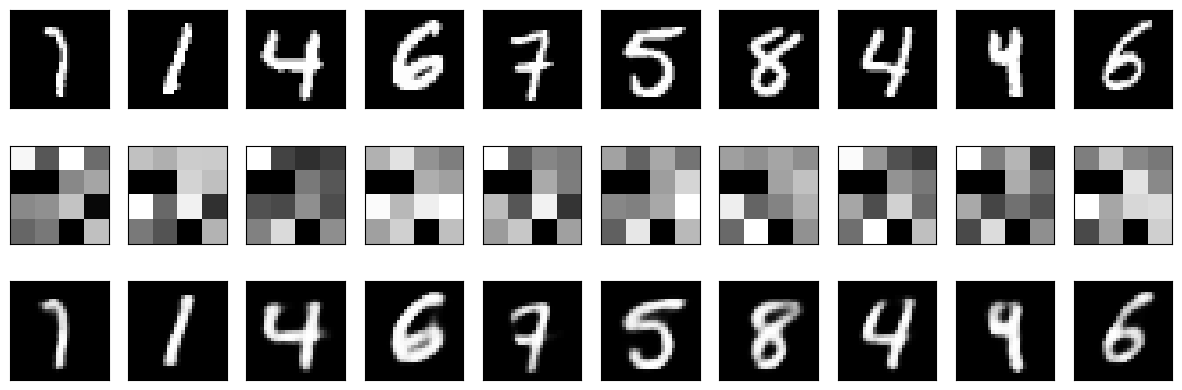

In [32]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=(4,4))
  display_one_row(disp_predicted, 20, shape=(28,28,))

# take 1 batch of the dataset
test_dataset = test.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output
encoded_predicted = model.Model_Encoder.predict(test_dataset)

# get a prediction for the test batch
deep_predicted = model.Model.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], deep_predicted[idxs])